## 107 - Declarative Plotting the GFS

[Youtube](https://www.youtube.com/watch?v=o9poTluofnw)

In [1]:
data_url = ('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')

# data_url = ('https://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_0p25deg_ana/GFS_Global_0p25deg_ana_20221119_1800.grib2')

In [2]:
from datetime import datetime, timedelta
import io
from metpy.units import units
from metpy.plots import ImagePlot, MapPanel, PanelContainer
from siphon.catalog import TDSCatalog
import xarray as xr

%matplotlib inline

In [3]:
best_gfs = TDSCatalog(data_url)
print(list(best_gfs.datasets))

['Best GFS Quarter Degree Forecast Time Series']


In [4]:
best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

In [5]:
query = ncss.query()

In [6]:
query.lonlat_box(north = 50, south = 25, east = -60, west = -130).time(datetime.utcnow() + timedelta(hours = 100))
query.accept('netcdf4')
query.variables('Temperature_surface')

var=Temperature_surface&time=2022-11-28T13%3A03%3A36.610749&west=-130&east=-60&south=25&north=50&accept=netcdf4

In [7]:
data = ncss.get_data_raw(query)
gfs = xr.open_dataset(io.BytesIO(data))
gfs

<xarray.Dataset>
Dimensions:                          (time: 1, latitude: 101, longitude: 281)
Coordinates:
    reftime                          (time) datetime64[ns] ...
  * latitude                         (latitude) float32 50.0 49.75 ... 25.0
  * time                             (time) datetime64[ns] 2022-11-28T12:00:00
  * longitude                        (longitude) float32 230.0 230.2 ... 300.0
Data variables:
    Temperature_surface              (time, latitude, longitude) float32 ...
    LatLon_721X1440-0p13S-180p00E-2  int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [8]:
img = ImagePlot()
img.data = gfs
img.field = 'Temperature_surface'
img.colormap = 'plasma'

In [9]:
panel = MapPanel()
panel.area = 'ar'
panel.layers = ['states']
panel.title = 'GFS Temperature Forecast 100 hrs'
panel.plots = [img]

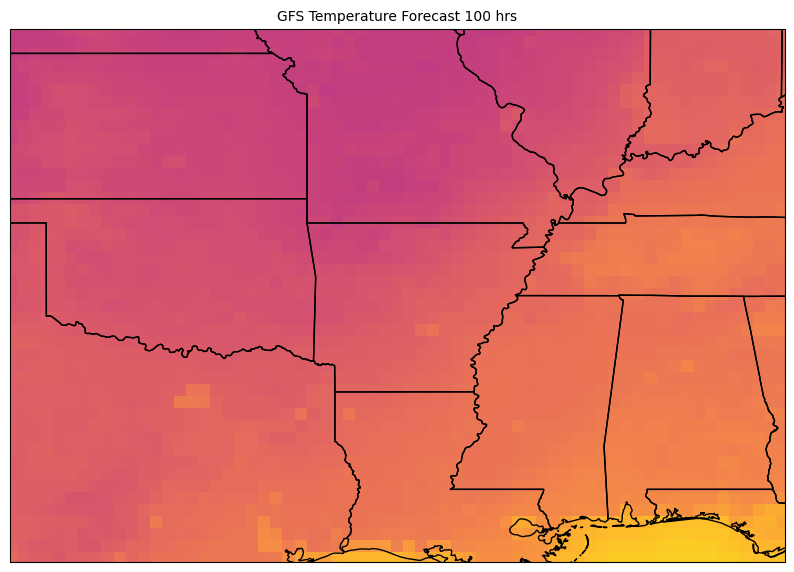

In [10]:
pc = PanelContainer()
pc.size = (10, 8)
pc.panels = [panel]
pc.show()